## Exploratory Data Analysis

### Import Libaries

In [1]:
# Import Libraries

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import pandas as pd
import matplotlib as mpl
# import chart_studio.plotly as py
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# from geopy import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
# Run the file Data_Preprocessing.ipynb which cleaned the data. Pre-processed data are saved in the data file

housing = pd.read_csv('../data/AmesHousing.csv', index_col = 0)
real_estate = pd.read_csv('../data/Ames Real Estate Data.csv', index_col = 0)
# combined data set:
ames_df = pd.read_csv('../data/final_df.csv', index_col = 0)

In [3]:
housing.shape

(2930, 81)

In [4]:
ames_df.shape

(3064, 179)

Text(0.5, 1.0, 'Ames Dataframe NA Values')

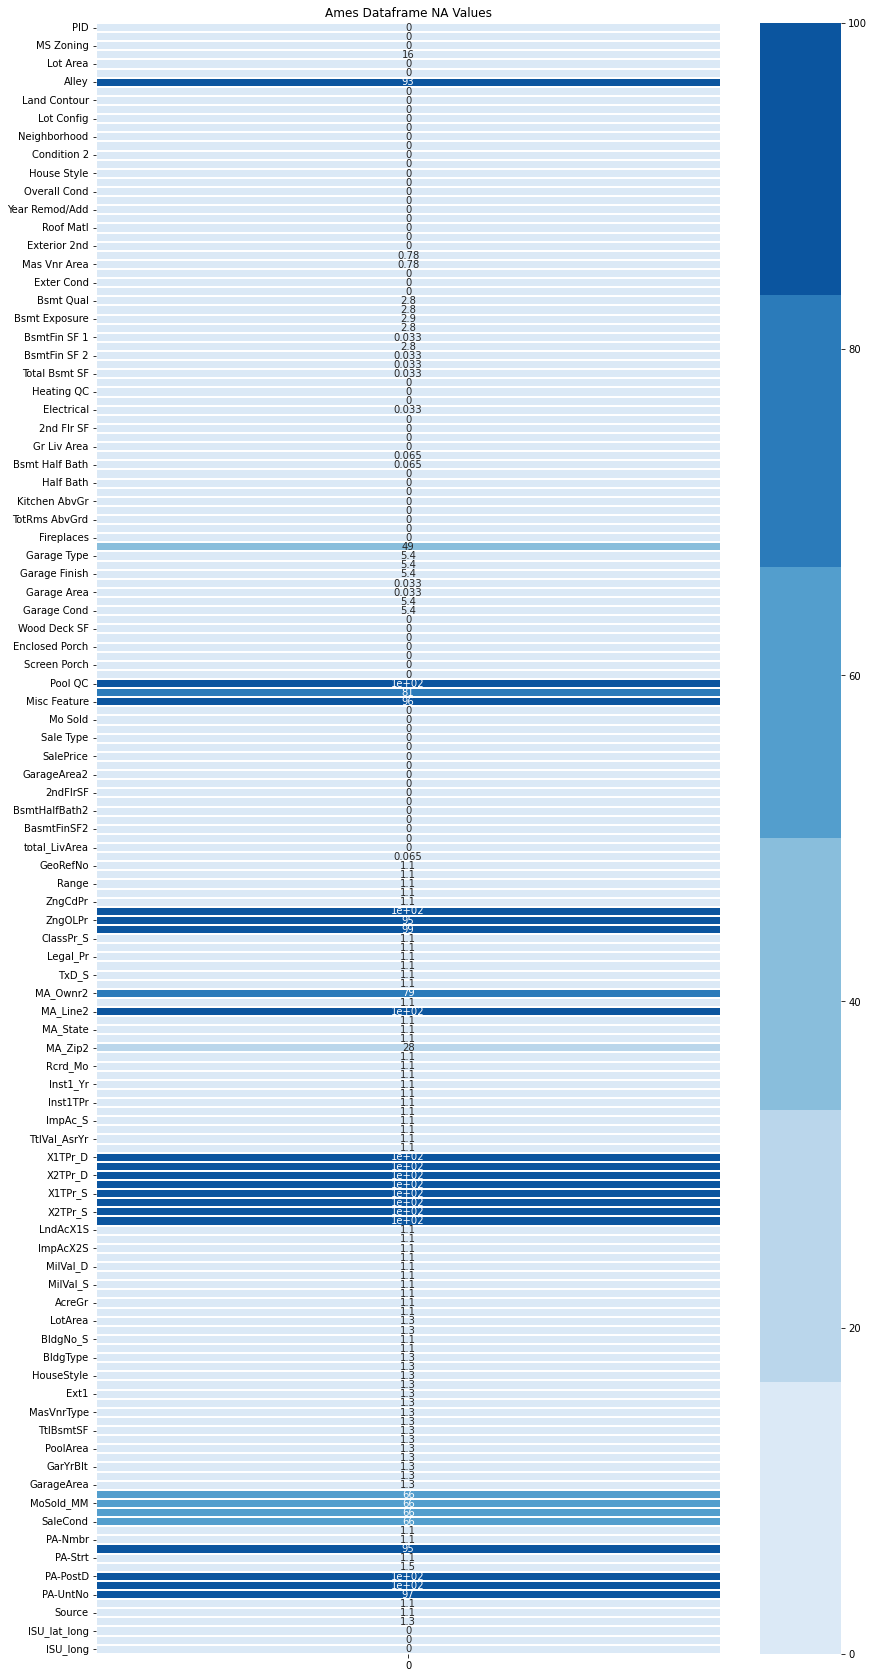

In [5]:
from IPython.display import display, HTML

cm = sns.light_palette("green",as_cmap=True)
plt.figure(figsize=(14,30))

sns.heatmap(pd.DataFrame(ames_df.isnull().sum()/ames_df.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.title("Ames Dataframe NA Values")

### Correlation Graph

<AxesSubplot:>

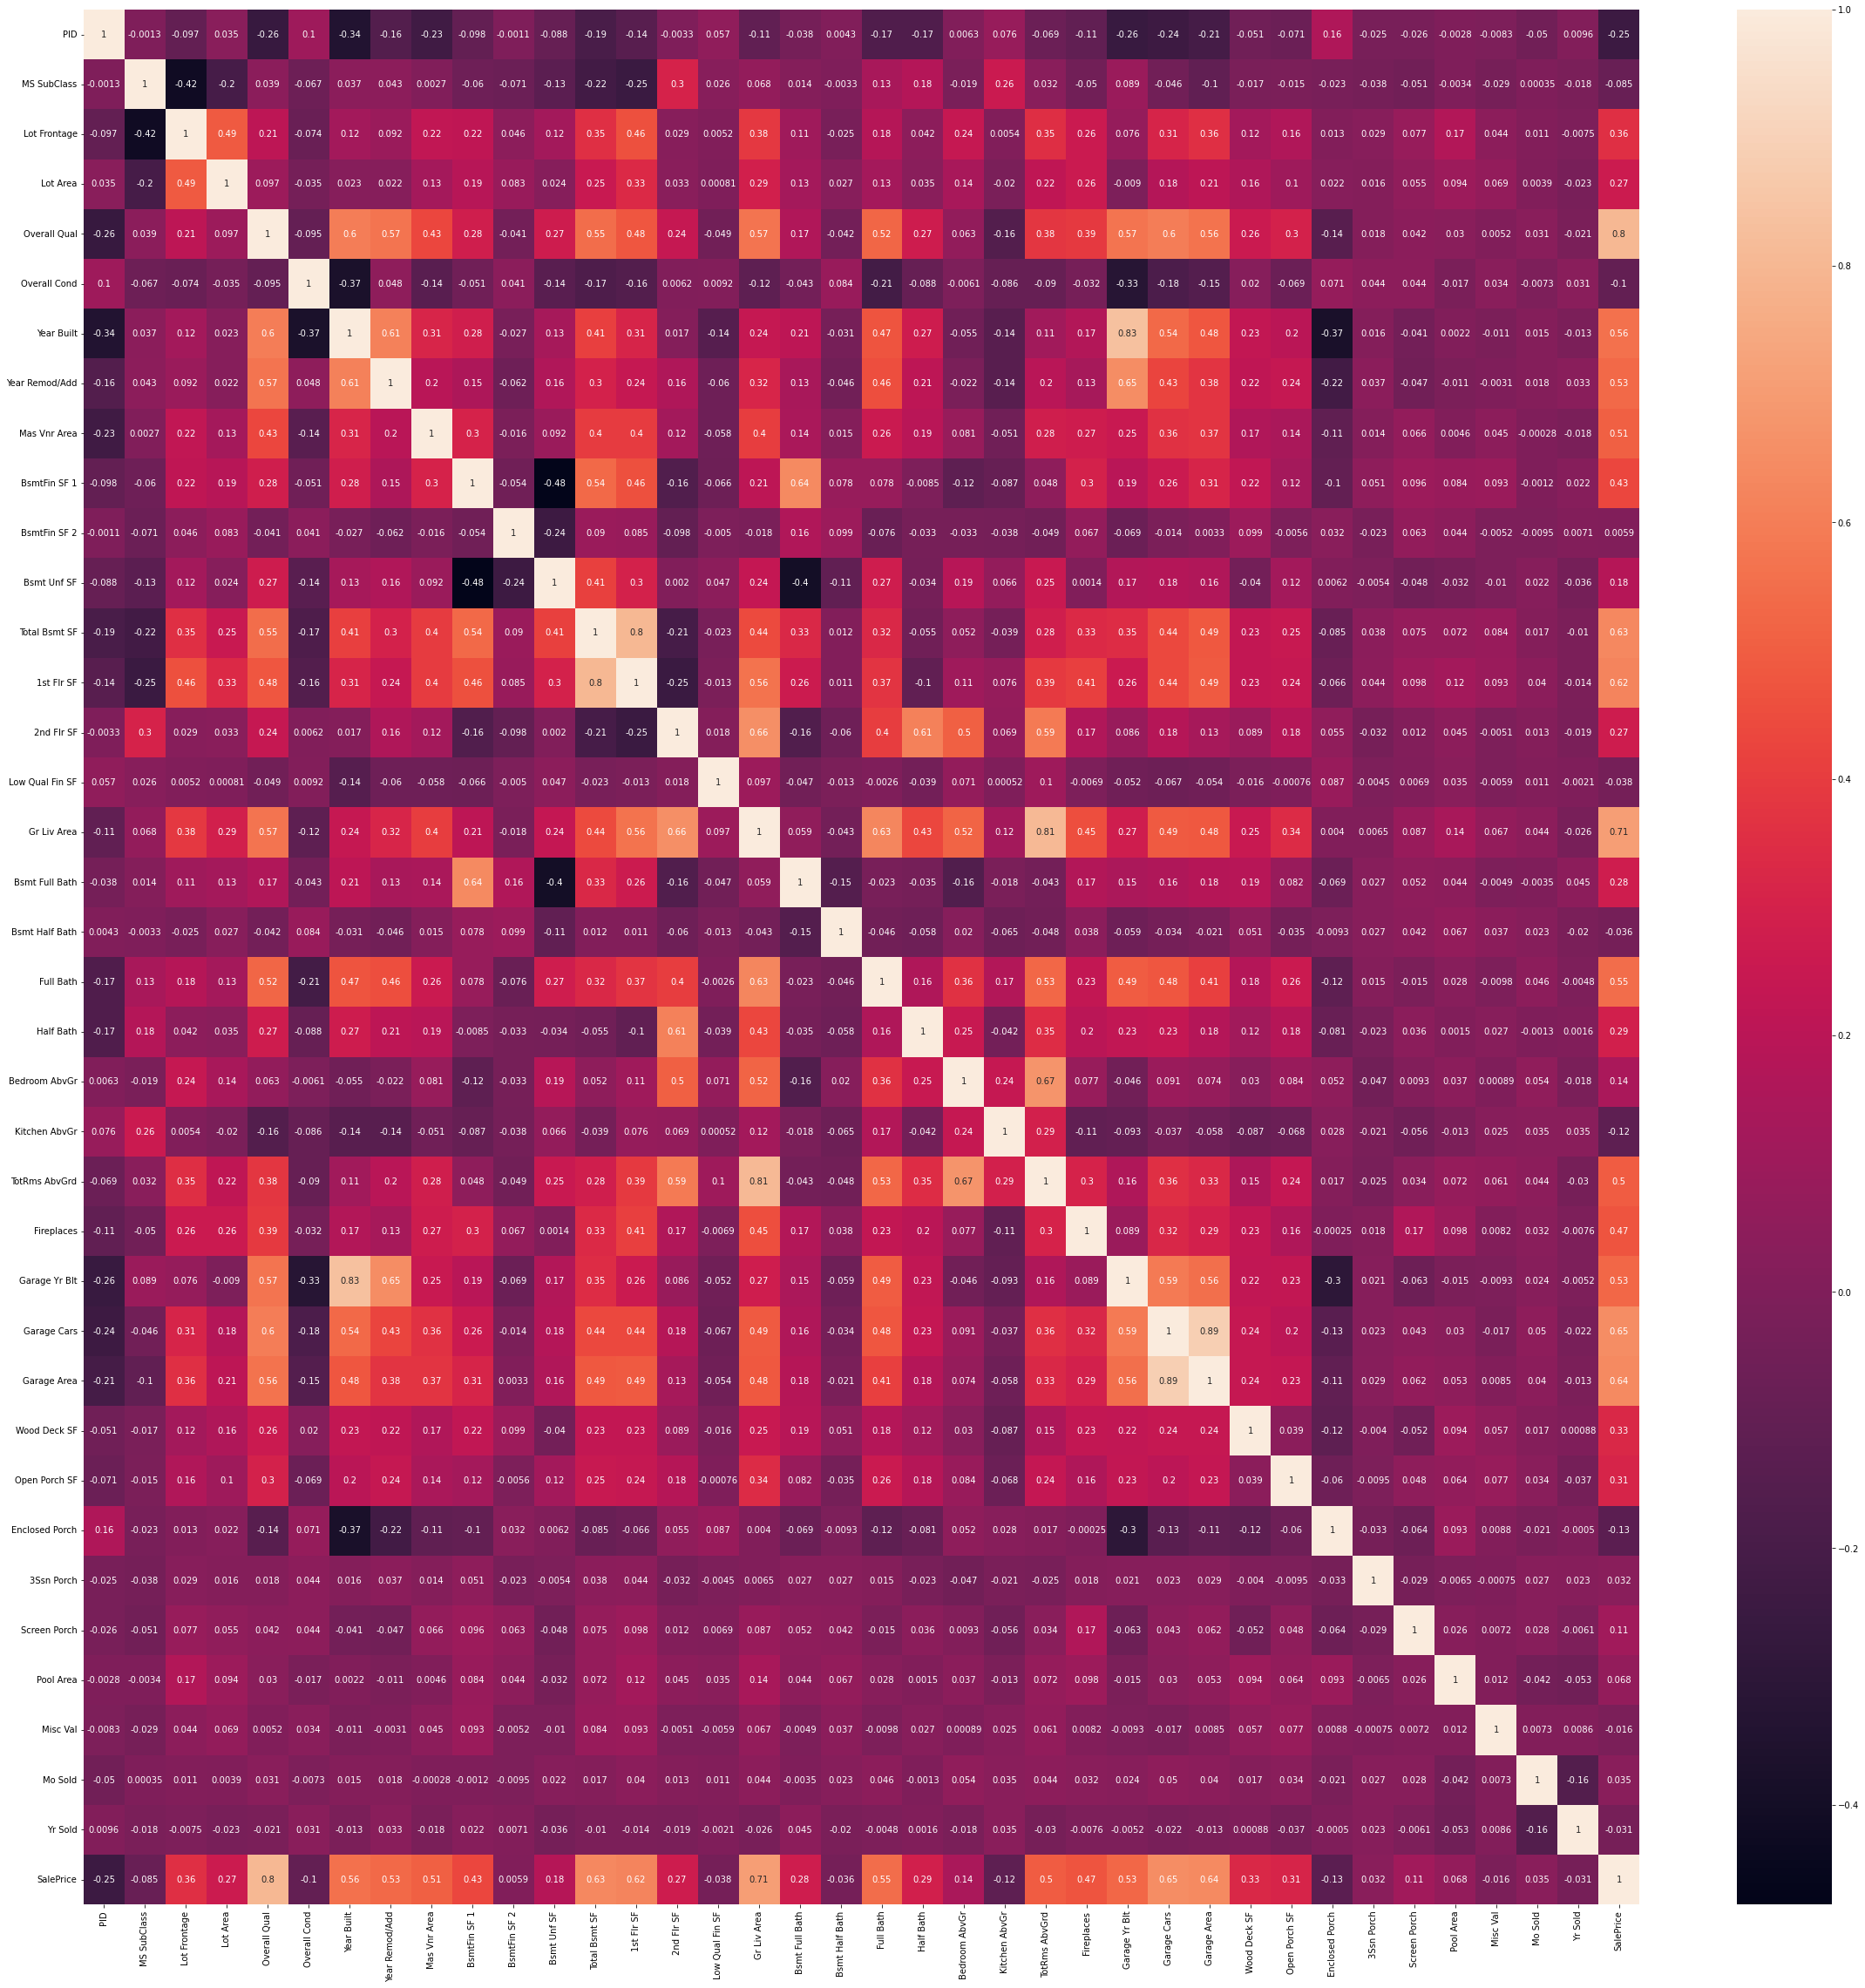

In [6]:
corr=housing.corr()
plt.figure(figsize = (40,40))
sns.heatmap(corr,annot=True)

### Target Variable

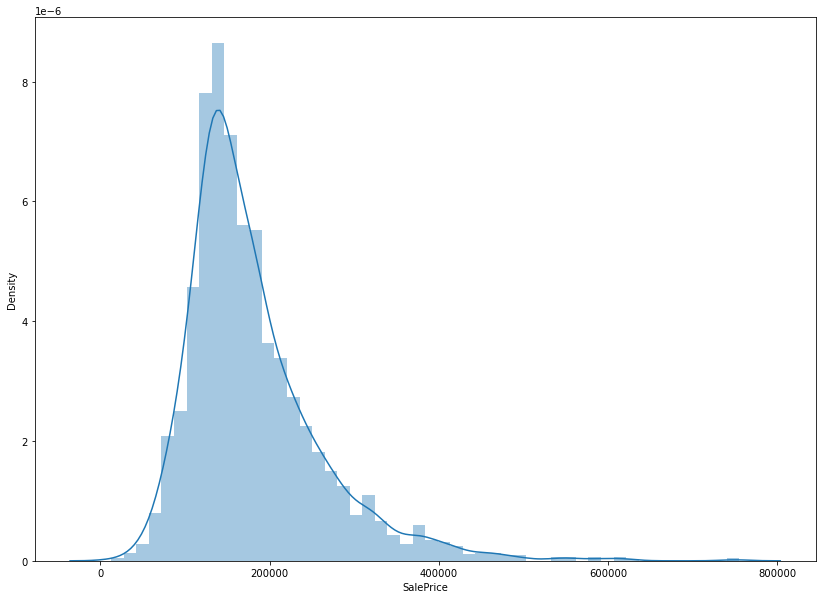

In [7]:
# SalePrice Histogram
plt.figure(figsize = (14,10))
sns.distplot(housing['SalePrice']);

<Figure size 1008x720 with 0 Axes>

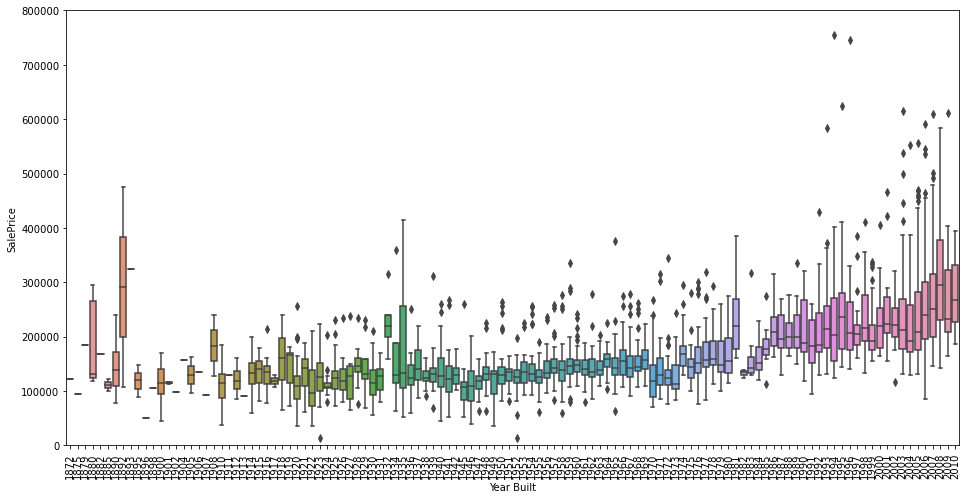

In [8]:
var = 'Year Built'
plt.figure(figsize = (14,10))
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Daniel

<Figure size 1008x432 with 0 Axes>

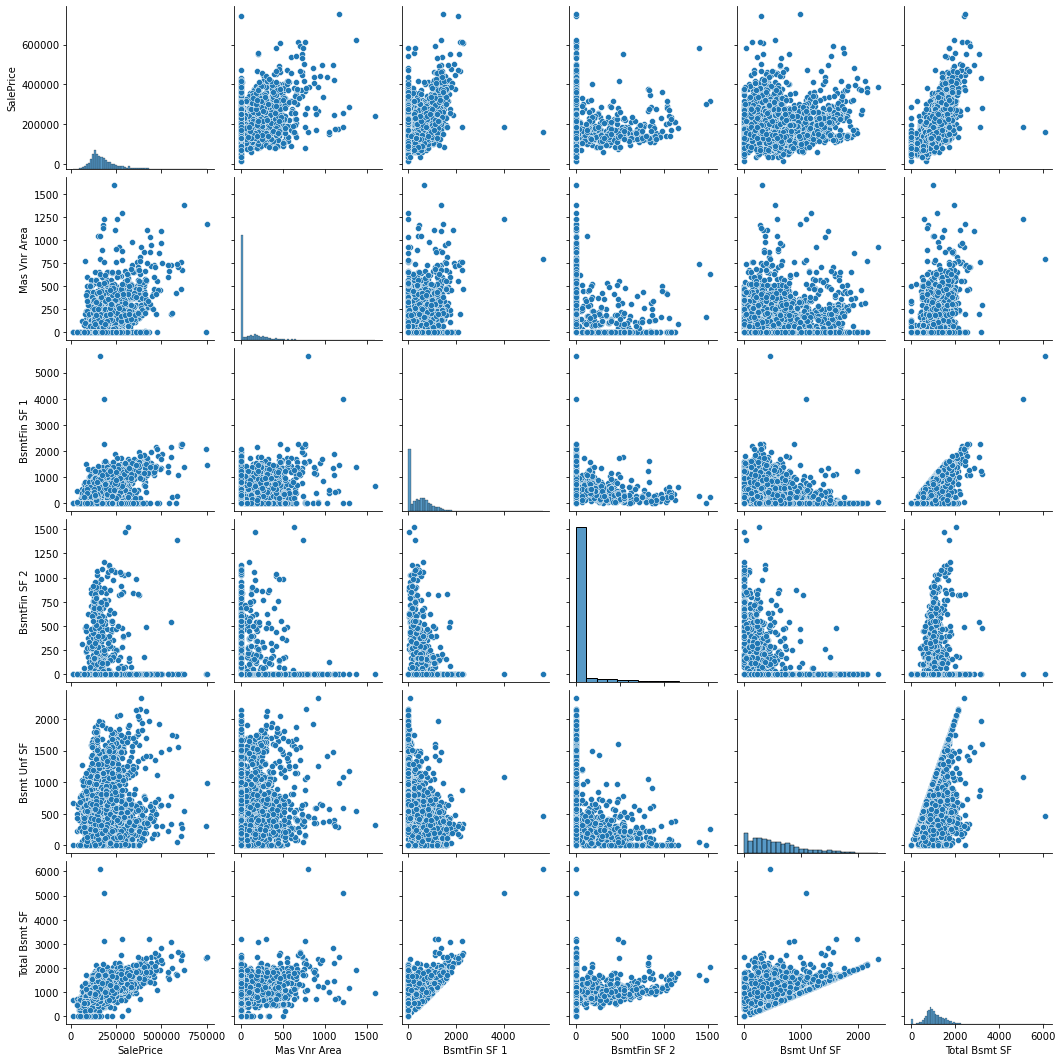

In [9]:
plt.figure(figsize = (14,6))
cols1 = ['SalePrice', 'Mas Vnr Area', 'BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']
sns.pairplot(housing[cols1], size = 2.5)
plt.show()

<AxesSubplot:title={'center':'Exterior Quality and Price'}, xlabel='Foundation', ylabel='SalePrice'>

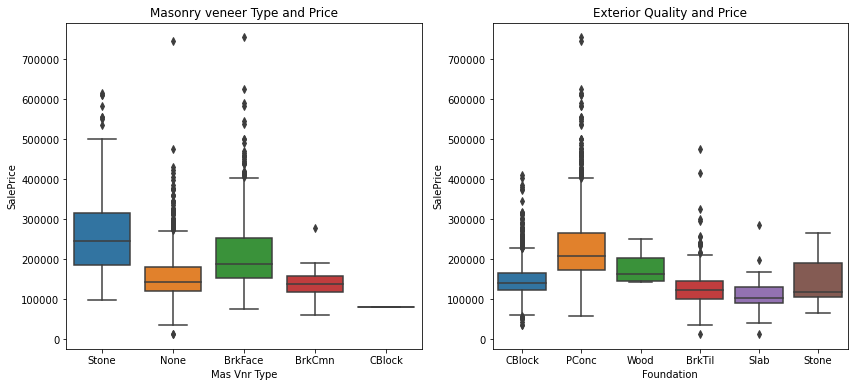

In [10]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1).set_title('Masonry veneer Type and Price')
sns.boxplot(x = 'Mas Vnr Type', y = 'SalePrice', data = housing)
plt.subplot(1,2,2).set_title("Exterior Quality and Price")
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing)

<AxesSubplot:title={'center':'Exterior Quality and Price'}, xlabel='Exter Qual', ylabel='SalePrice'>

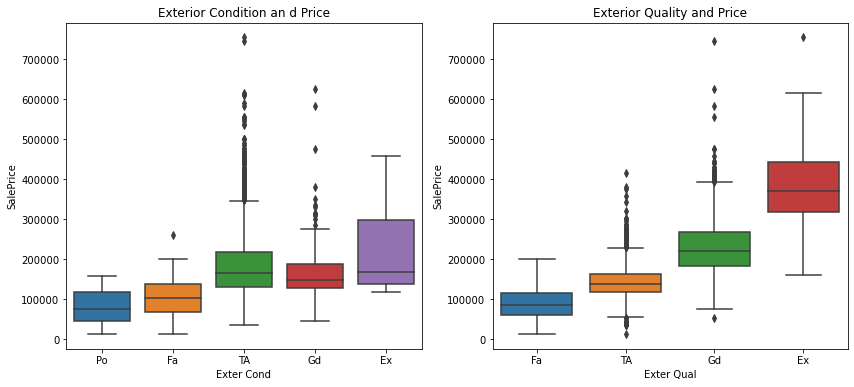

In [11]:
# Exterior Condition / Quality and Pirce
plt.figure(figsize = (14,6))
plt.subplot(1,2,1).set_title("Exterior Condition an d Price")
sns.boxplot(x = 'Exter Cond', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(1,2,2).set_title("Exterior Quality and Price")
sns.boxplot(x = 'Exter Qual', y = 'SalePrice', order=["Fa","TA","Gd", "Ex"], data = housing)

<AxesSubplot:title={'center':'Basement Final (Square Feet) and Price'}, xlabel='Total Bsmt SF', ylabel='SalePrice'>

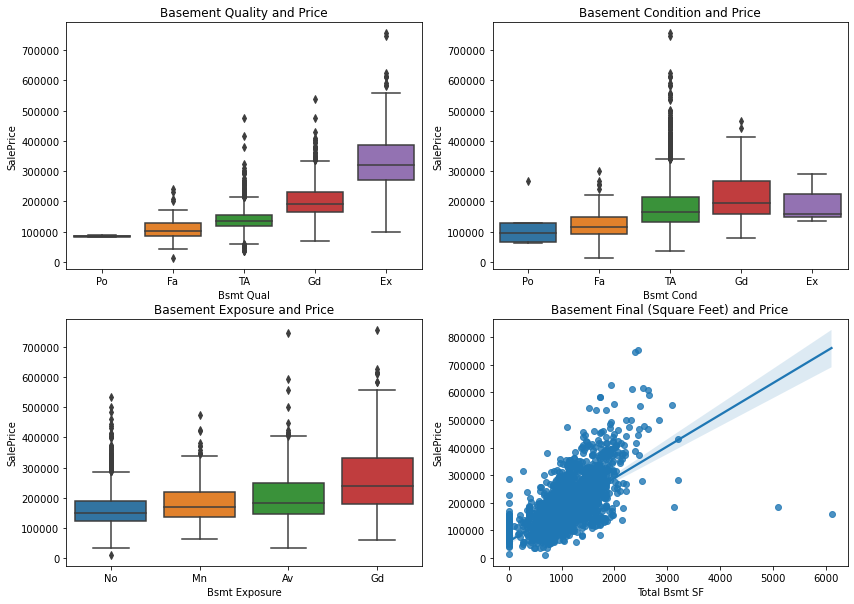

In [12]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1).set_title("Basement Quality and Price")
sns.boxplot(x = 'Bsmt Qual', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(2,2,2).set_title("Basement Condition and Price")
sns.boxplot(x = 'Bsmt Cond', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(2,2,3).set_title("Basement Exposure and Price")
sns.boxplot(x = 'Bsmt Exposure', y = 'SalePrice', order=["No","Mn","Av","Gd"], data = housing)
plt.subplot(2,2,4).set_title("Basement Final (Square Feet) and Price")
sns.regplot(x = 'Total Bsmt SF', y = 'SalePrice', data = housing)

<AxesSubplot:title={'center':'Number of Bathroom and Price'}, xlabel='Full Bath', ylabel='SalePrice'>

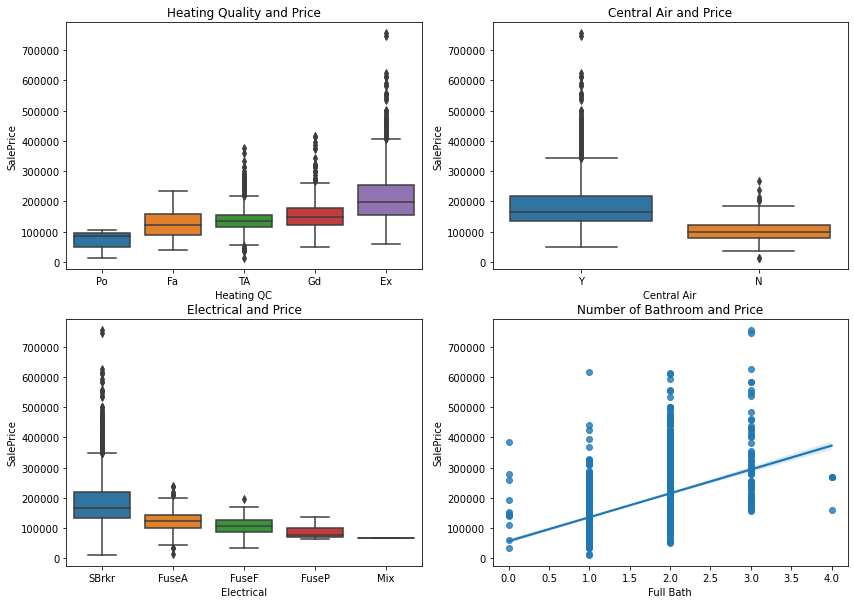

In [13]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1).set_title("Heating Quality and Price")
sns.boxplot(x = 'Heating QC', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(2,2,2).set_title("Central Air and Price")
sns.boxplot(x = 'Central Air', y = 'SalePrice', data = housing)
plt.subplot(2,2,3).set_title("Electrical and Price")
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing)
plt.subplot(2,2,4).set_title("Number of Bathroom and Price")
sns.regplot(x = 'Full Bath', y = 'SalePrice', data = housing)

<AxesSubplot:title={'center':'Building Type and Price'}, xlabel='BldgType', ylabel='SalePrice'>

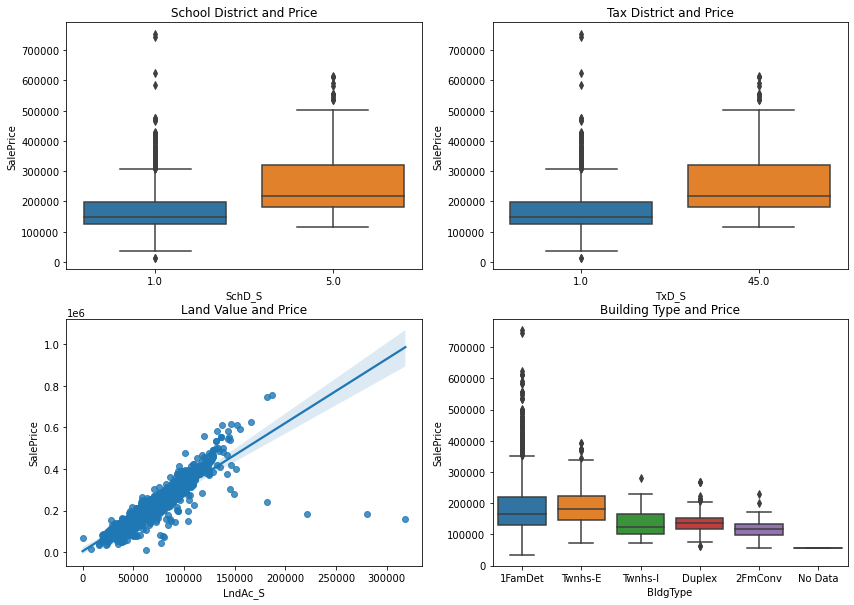

In [14]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1).set_title("School District and Price")
sns.boxplot(x = 'SchD_S', y = 'SalePrice', data = ames_df)
plt.subplot(2,2,2).set_title("Tax District and Price")
sns.boxplot(x = 'TxD_S', y = 'SalePrice', data = ames_df)
plt.subplot(2,2,3).set_title("Land Value and Price")
sns.regplot(x = 'LndAc_S', y = 'SalePrice', data = ames_df)
plt.subplot(2,2,4).set_title("Building Type and Price")
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = ames_df)

<AxesSubplot:xlabel='ZngCdPr', ylabel='SalePrice'>

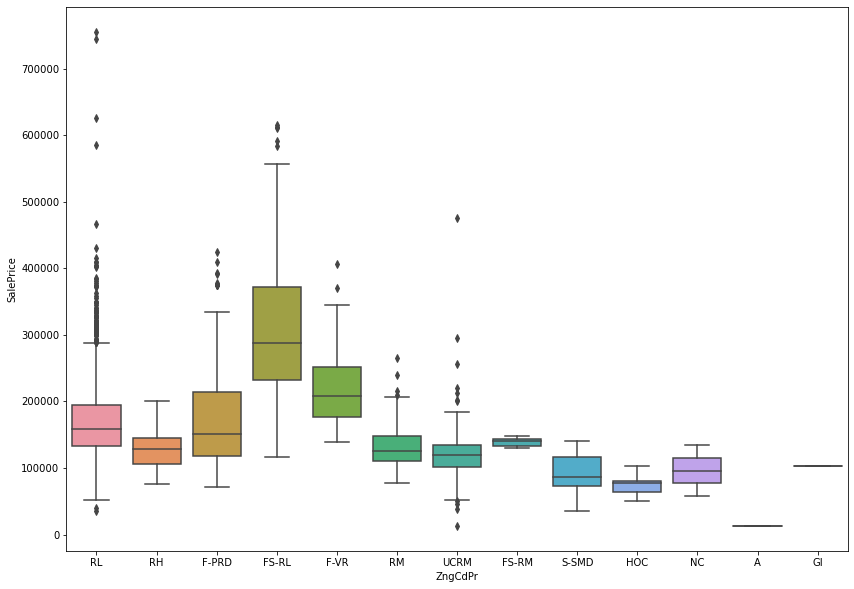

In [15]:
plt.figure(figsize = (14,10))
sns.boxplot(x = 'ZngCdPr', y = 'SalePrice', data = ames_df)

In [16]:
n = len(pd.unique(ames_df['Neighborhood'])) 
  
print("No.of.unique values :",  n)

No.of.unique values : 28


In [17]:
ames_df.Neighborhood.unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [18]:
ames_df['Neighborhood'].isnull().sum()

0

In [19]:
geo_heatmap = {
    'Neighborhood' : ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards',\
        'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes','OldTown',\
        'SWISU','Sawyer','SawyerW', 'Somerst', 'StoneBr', 'Timber','Veenker', 'Greens','GrnHill','Landmrk'],\
    'Latitude' : [42.0563761, 42.0218678, 42.052795, 42.024546, 42.0360959, 42.0214232, 42.028025, 42.0154024,\
        42.1068177, 42.0204395, 41.997282, 41.9903084, 42.046618, 42.048164, 42.0258352, 42.0597732, 42.0457802,\
        42.029046, 42.0266187, 42.0295218, 42.034611, 42.0508817, 42.0595539, 41.9999732, 42.0413042, 42.001350383364695, 42.02547896,42.6541287],\
    'Longitude' : [-93.6466598, -93.6702853, -93.6310097, -93.6545201, -93.6575849, -93.6584089, -93.6093286,
        -93.6875441, -93.6553512, -93.6243787, -93.6138098, -93.603242, -93.6362807, -93.6496766, -93.6613958,
        -93.65166, -93.6472075, -93.6165288, -93.6486541, -93.7102833, -93.7024257, -93.6485768, -93.6365891,
        -93.6518812, -93.6524905, -93.6446034587931,-93.5487695,-93.5214789]
}

In [20]:
ames_neighborhood = set(ames_df['Neighborhood'].tolist())

geo_dataframe = pd.DataFrame.from_dict(geo_heatmap)

geo_dataframe = geo_dataframe[geo_dataframe['Neighborhood'].isin(ames_neighborhood)]

geo_dataframe["SalePrice"] = pd.Series(ames_df.groupby(["Neighborhood"]).mean()["SalePrice"].values,\
                                       index = geo_dataframe.index)

import folium
from folium.plugins import HeatMap

max_amount = float(geo_dataframe['SalePrice'].max())
hmap = folium.Map(location = [42.045042,-93.6473567], zoom_start = 12)
hm_wide = HeatMap(list(zip(geo_dataframe.Latitude.values, geo_dataframe.Longitude.values,\
                              geo_dataframe.SalePrice.values)),
                   min_opacity = 0.4,
                   max_val = max_amount,
                       radius = 40,
                   blur = 20,
                   max_zoom = 1
                  )
hmap.add_child(hm_wide)

In [21]:
geo_dataframe.head()

,Neighborhood,Latitude,Longitude,SalePrice
0,Blmngtn,42.056376,-93.646660,196661.678571
1,Blueste,42.021868,-93.670285,138950.000000
2,BrDale,42.052795,-93.631010,106008.064516
3,BrkSide,42.024546,-93.654520,124301.590909
4,ClearCr,42.036096,-93.657585,207869.600000


In [22]:
ames_df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       ...
       'PA-StSfx', 'PA-PostD', 'PA-UnTyp', 'PA-UntNo', 'Date', 'Source',
       'NmbrBRs', 'ISU_lat_long', 'ISU_lat', 'ISU_long'],
      dtype='object', length=179)

In [23]:
housing3 = pd.concat([housing[housing.columns[53:]],housing['SalePrice']],axis=1)
housing3.columns

Index(['Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence',
       'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice', 'SalePrice'],
      dtype='object')

- GarageCars, GarageArea, GarageYrBlt, TotRmsAbvGrd, Fireplaces, OpenPorchSF, and WoodDeckSF are more correlated with Price

In [24]:
housing_features = housing[housing.columns[53:]]
housing_features = housing_features.rename(columns= {"3SsnPorch":"X3SsnPorch"})
housing_featuresClass = housing_features[['Kitchen Qual','Functional','Fireplace Qu','Garage Type','Garage Finish','Garage Qual',\
                                         'Garage Cond','Paved Drive','Pool QC','Fence','Misc Feature','Sale Type','Sale Condition']]
housing_featuresQuan = housing_features[['TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars','Garage Area',\
                                        'Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area',\
                                         'Misc Val','Mo Sold','Yr Sold']]

# housing_features.columns
# housing_featuresClass.columns
# housing_featuresQuan.columns

In [25]:
for feature1 in housing_featuresClass.columns:
    print(housing3[feature1].value_counts(), housing_featuresClass[feature1].isnull().value_counts())
    print('*'*30)

TA    1494
Gd    1160
Ex     205
Fa      70
Po       1
Name: Kitchen Qual, dtype: int64 False    2930
Name: Kitchen Qual, dtype: int64
******************************
Typ     2728
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Sal        2
Name: Functional, dtype: int64 False    2930
Name: Functional, dtype: int64
******************************
Gd    744
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64 False    1508
True     1422
Name: Fireplace Qu, dtype: int64
******************************
Attchd     1731
Detchd      782
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64 False    2773
True      157
Name: Garage Type, dtype: int64
******************************
Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64 False    2771
True      159
Name: Garage Finish, dtype: int64
******************************
TA    2615
Fa     124
Gd      24
Po       5
Ex       3
Name: Garag

In [26]:
housing_featuresQuan.columns

Index(['TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold'],
      dtype='object')

In [27]:
for feature2 in housing_featuresQuan.columns:
    print(housing_featuresQuan[feature2].isnull().value_counts())
    print('*'*30)

False    2930
Name: TotRms AbvGrd, dtype: int64
******************************
False    2930
Name: Fireplaces, dtype: int64
******************************
False    2771
True      159
Name: Garage Yr Blt, dtype: int64
******************************
False    2929
True        1
Name: Garage Cars, dtype: int64
******************************
False    2929
True        1
Name: Garage Area, dtype: int64
******************************
False    2930
Name: Wood Deck SF, dtype: int64
******************************
False    2930
Name: Open Porch SF, dtype: int64
******************************
False    2930
Name: Enclosed Porch, dtype: int64
******************************
False    2930
Name: 3Ssn Porch, dtype: int64
******************************
False    2930
Name: Screen Porch, dtype: int64
******************************
False    2930
Name: Pool Area, dtype: int64
******************************
False    2930
Name: Misc Val, dtype: int64
******************************
False    2930
Name: Mo Sold, d

- Higher kitchen quality could increase house price
- Price has no significant difference in number of kitchen with same quality.

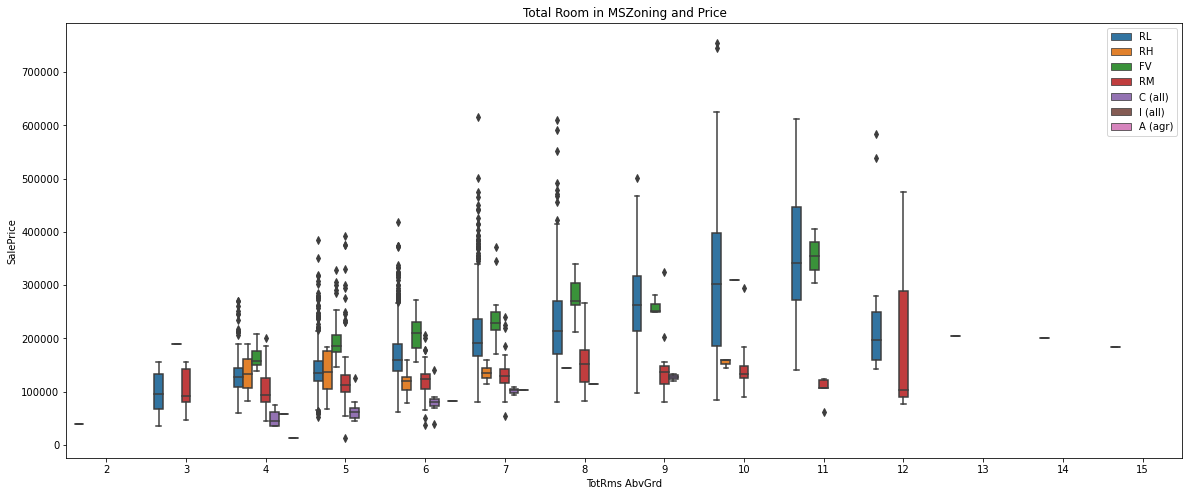

In [28]:
# Total Room (Not including bathroom) vs. Price
plt.figure(figsize=(20,8))
plt.title('Total Room in MSZoning and Price')
sns.boxplot(x = 'TotRms AbvGrd', y = 'SalePrice', data = housing, hue = 'MS Zoning').legend(loc='upper right')


- Floating Village Residential zoning has highest house price for total room number between 4 to 8
- Residential Low Density zoning has biggest price variance and has total room number from 3 to 12
- Residential Medium Density zoning has price jump for total room number = 12
- Residential High Density and Commercial zoning both have total room number between 4 to 6, price(RH) > price(C)

- Garage with good and excellent quality, they do have paved drive way and higher house price
- Paved drive way has higher house price compare to no paved for the same garage quality

- House price increase as more recent garage built

<AxesSubplot:title={'center':'Porch Area and Price'}, xlabel='Open Porch SF', ylabel='SalePrice'>

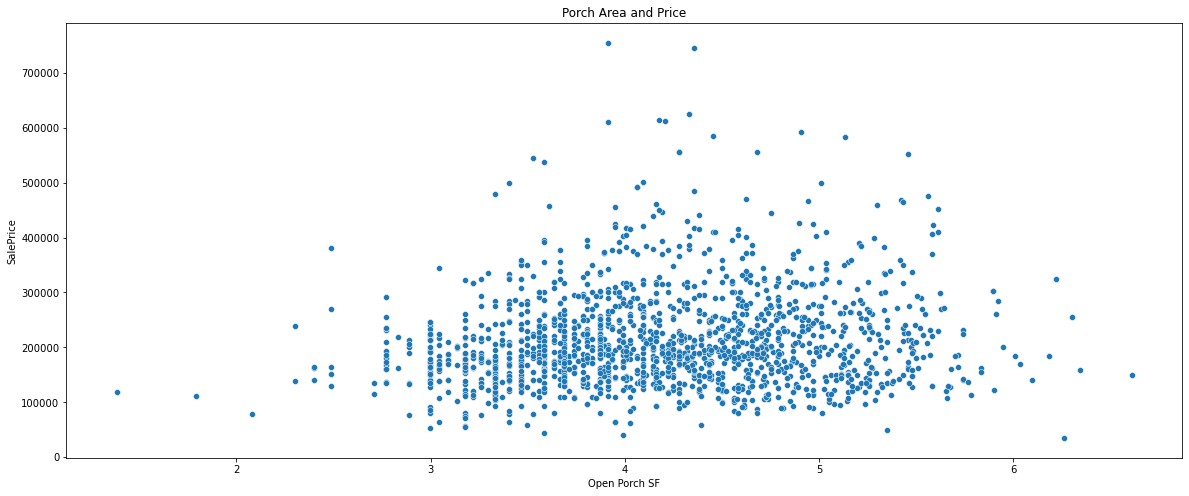

In [29]:
plt.figure(figsize=(20,8))
plt.title('Porch Area and Price')
log_SF = np.log(ames_df['Open Porch SF'])
sns.scatterplot(x = log_SF, y = 'SalePrice', data = ames_df)